## Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 설명변수: 꽃받침 길이, 꽃받침 폭 , 꽃잎 길이 , 꽃잎 폭  <br> 
(sepal length , sepal width , petal length , petal width)


* 타겟변수: 붓꽃의 품종 - 총 3가지 종류  <br>
(Iris-Setosa , Iris-Versicolour , Iris-Virginica - 0 1 2)

In [4]:
#iris.data -> features, iris.target -> labels
X = iris.data
y = iris.target

## EDA

In [5]:
X_df = pd.DataFrame(data=X, columns=['sepal_length', 'sepal_width', 'petal_length', "petal_width"])
y_df = pd.DataFrame(data=y)

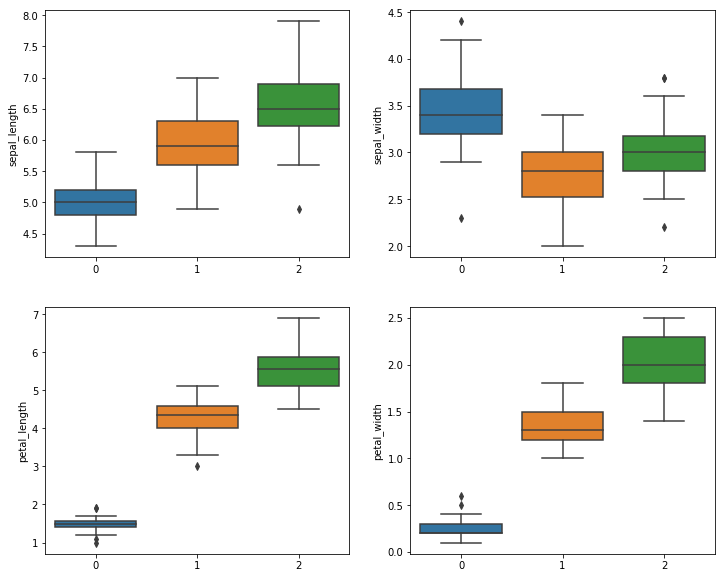

In [6]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

sns.boxplot(y, X_df['sepal_length'], ax = axes[0][0])
sns.boxplot(y, X_df['sepal_width'], ax = axes[0][1])
sns.boxplot(y, X_df['petal_length'], ax = axes[1][0])
sns.boxplot(y, X_df['petal_width'], ax = axes[1][1])

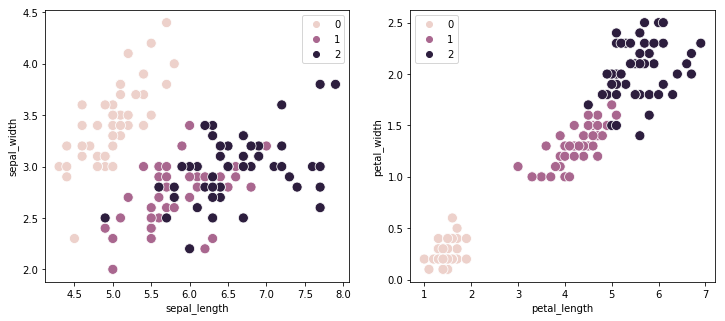

In [7]:
figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(12,5)

sns.scatterplot(x=X_df['sepal_length'], y=X_df['sepal_width'], hue=y, s=100, ax=axes[0])
sns.scatterplot(x=X_df['petal_length'], y=X_df['petal_width'], hue=y, s=100, ax=axes[1])

붓꽃의 품종에 따라 꽃받침 길이, 꽃받침 폭 , 꽃잎 길이 , 꽃잎 폭의 분포가 다르다 
* Setosa (0): sepal_length 값이 작고, sepal_width 값이 큰 편이며, petal_length와 petal_width 값은 작은 편이다 
* Versicolour (1) : sepal_length는 중간 정도의 값을 갖고 sepal_width는 가장 작은 값을 가지며, petal_length와 petal_width는 중간 정도의 값을 갖는다 
* Virginica (2) : sepal_length의 값이 큰 편이고, sepal_width의 값은 중간 정도이며, petal_length와 petal_width는 값은 큰 편이다

## Preprocessing

In [8]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[0.46428571, 0.35      , 0.64444444, 0.5       ],
       [0.60714286, 0.3       , 0.75555556, 0.45454545],
       [0.60714286, 0.2       , 0.95555556, 0.54545455],
       [0.03571429, 0.05      , 0.        , 0.04545455],
       [0.53571429, 0.5       , 0.77777778, 0.72727273],
       [0.75      , 0.4       , 0.93333333, 0.72727273],
       [0.25      , 0.8       , 0.04444444, 0.04545455],
       [0.57142857, 0.4       , 0.77777778, 0.72727273],
       [0.39285714, 1.        , 0.02222222, 0.        ],
       [0.39285714, 0.15      , 0.6       , 0.5       ],
       [0.71428571, 0.45      , 0.93333333, 0.72727273],
       [0.39285714, 0.65      , 0.        , 0.        ],
       [0.35714286, 0.6       , 0.08888889, 0.        ],
       [0.64285714, 0.3       , 0.77777778, 0.72727273],
       [0.67857143, 0.05      , 0.68888889, 0.5       ],
       [0.67857143, 0.55      , 0.75555556, 0.63636364],
       [0.14285714, 0.6       , 0.06666667, 0.        ],
       [0.57142857, 0.        ,

* X의 모든 값이 0과 1 사이의 값을 가지게끔 MinMaxScaling을 진행한다
* scaling은 train/test split 한 후에 진행한다 -> 미리 진행한다면 test set에 scaling한 정보가 반영되기 때문이다

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

## Modeling

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### 1. 일반적인 KNN 모델 

In [12]:
# build KNN model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

In [13]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
# get the predict value(y_pred) from X_test
y_pred = knn.predict(X_test)

In [15]:
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9333333333333333


### 2. Grid Search

In [16]:
grid_params = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [17]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
    )

In [18]:
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.7s finished
C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


* (3 fold cv) x (neighbor 4개 x weight 2개 x metric 2개) = 48

In [19]:
#가장 좋은 결과를 얻는 그리드 출력
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


* euclidean 거리 측정법 사용 + neighbor 수는 3 + 동일하게 가중치를 주었을 때 가장 좋은 성능을 얻는다 

In [20]:
#grid_search의 최종 스코어 출력
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))

Best Cross-validity Score: 0.983


In [21]:
#Test 데이터에 대해 grid_search 알고리즘 적용
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Test set Score: 0.933


In [22]:
result_gs = pd.DataFrame(gs.cv_results_)

C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\utils\deprec

In [23]:
result_gs.loc[result_gs["params"] == {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002463,0.001107,0.006339,0.00091,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.97561,0.975,1.0,0.983333,0.011568,1,0.974684,0.9875,0.950617,0.970934,0.015289


* mean_train_score = 0.97, mean_test_score = 0.98 -> train set과 test set에서 모두 좋은 결과를 얻는다

### 3. n-neighbors만 조정 

In [24]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [25]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [26]:
grid_search.fit(X_train, y_train)

C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 5}


In [28]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.983


In [29]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.933


#### graph

In [30]:
result_grid = pd.DataFrame(grid_search.cv_results_)

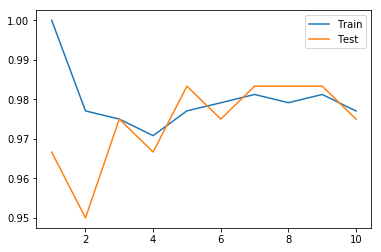

In [31]:
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

In [32]:
result_grid.loc[result_grid["param_n_neighbors"] == 5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.000547,0.000455,0.002405,0.000485,5,{'n_neighbors': 5},1.0,0.958333,1.0,0.958333,...,0.983333,0.020412,1,0.968421,0.989583,0.979167,0.979167,0.969072,0.977082,0.007799


* n_neighbors의 숫자가 바뀔 때 train set score와 test set score의 분포는 다음과 같다 
* n_neighbors = 5 일때, mean_train_score = 0.977, mean_test_score = 0.983으로  
train set과 test set에서 모두 좋은 결과를 얻는다 
* 3개의 모델을 비교했을 때, data set의 크기가 작기 때문에, hyperparameter를 튜닝했음에도 accuracy는 비슷한 편임을 볼 수 있다 